# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

In [144]:
# Write the code for your answer here. You can use 
#multiple cells to improve readability.

#1a

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 
           'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [2]:
#1b

import numpy as np
import matplotlib.pyplot as plt

scale = 0.18

torch.manual_seed(1718231)


####PROBABLY NOT NEEDED... PLEASE IGNORE IF UNUSED####
dataiterTR = iter(trainloader)
imagesTR, labelsTR = dataiterTR.next()

dataiterTE = iter(testloader)
imagesTE, labelsTE = dataiterTE.next()

imagesTR += scale*torch.randn(4, 3, 32, 32)

imagesTE += scale*torch.randn(4, 3, 32, 32)
####PROBABLY NOT NEEDED... PLEASE IGNORE IF UNUSED####



torch.manual_seed(1718231)

#adding noise to training set and normalising it
trainsetN = list(trainset)
for g in range(len(trainsetN)):
    trainsetN[g]= list(trainsetN[g])
    trainsetN[g][0]+= scale*torch.randn(3, 32, 32)
    trainsetN[g][0] = (trainsetN[g][0]).numpy()
    trainsetN[g][0] = np.clip(trainsetN[g][0], -1, 1)
    trainsetN[g][0] = torch.tensor(trainsetN[g][0])


    
    
    
testsetN = list(testset)
for d in range(len(testsetN)):
    testsetN[d]= list(testsetN[d])
    testsetN[d][0]+= scale*torch.randn(3, 32, 32) 
    testsetN[d][0] = (testsetN[d][0]).numpy()
    testsetN[d][0] = np.clip(testsetN[d][0], -1, 1)
    testsetN[d][0] = torch.tensor(testsetN[d][0])

    


In [3]:
#1c



#Train set is 50,000 tuples of length 2: one 32 by 32 tensor 
#and one number between one and ten: indicating if it is cat, truck, etc
#we can call this the label indicator

d = trainset[2348]
w=d[0]

#print(d)
print(len(d))

print(type(w))
print(type(d[1]))

#Now we can create new list and add tuple to list if its label ind. 
#is 3 (cat) or 5 (dog)

CatDogTrain = []

for v in range(len(trainset)):
    if ( (trainset[v][1] == 3) | (trainset[v][1] == 5) ):
        CatDogTrain.append(trainset[v])


CatDogTest = []

for v in range(len(testset)):
    if ( (testset[v][1] == 3) | (testset[v][1] == 5) ):
        CatDogTest.append(testset[v])

        
       
CatDogTrainN = []

for v in range(len(trainsetN)):
    if ( (trainsetN[v][1] == 3) | (trainsetN[v][1] == 5) ):
        CatDogTrainN.append(trainsetN[v])


CatDogTestN = []

for v in range(len(testsetN)):
    if ( (testsetN[v][1] == 3) | (testsetN[v][1] == 5) ):
        CatDogTestN.append(testsetN[v])




2
<class 'torch.Tensor'>
<class 'int'>


CATS:
Cat 1


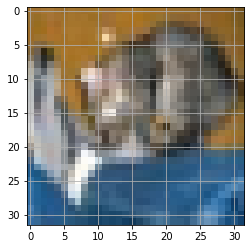

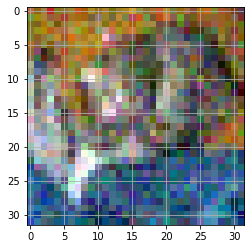

Cat 2


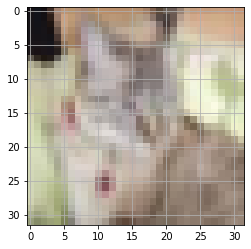

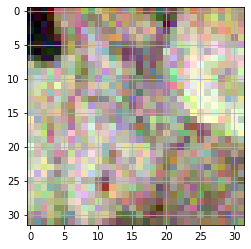

Cat 3


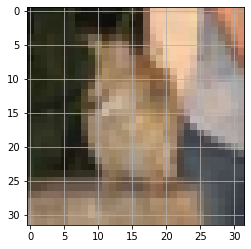

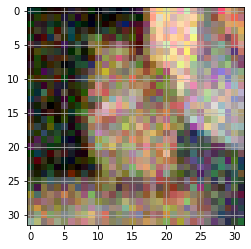

Cat 4


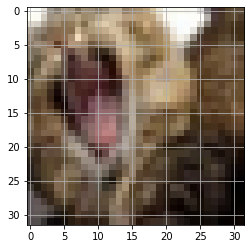

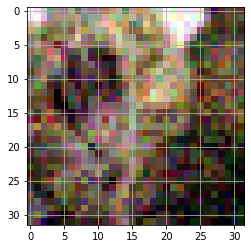

Cat 5


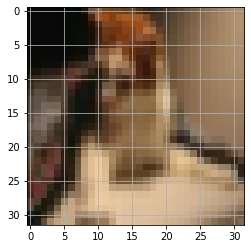

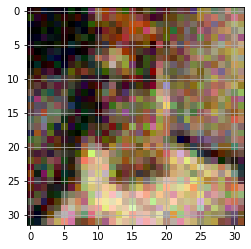

Cat 6


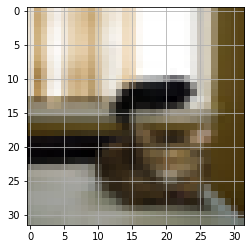

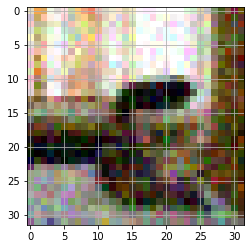

Cat 7


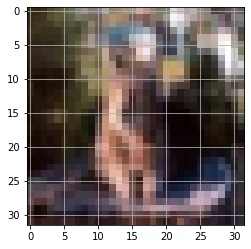

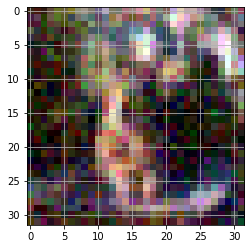

Cat 8


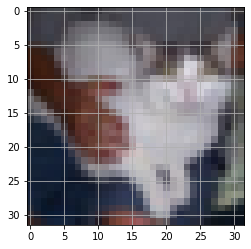

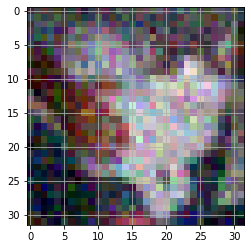

Cat 9


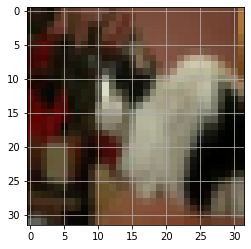

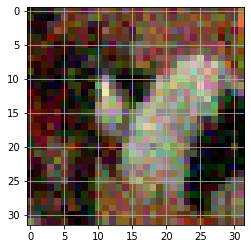

Cat 10


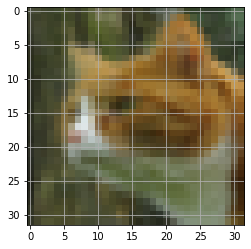

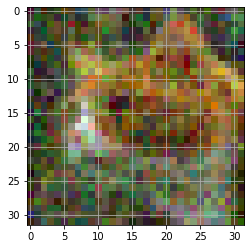

DOGS:
Dog 1


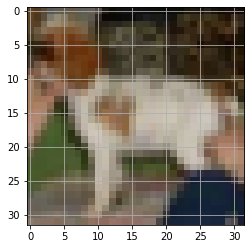

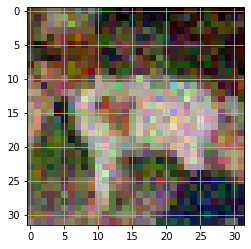

Dog 2


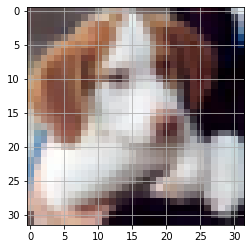

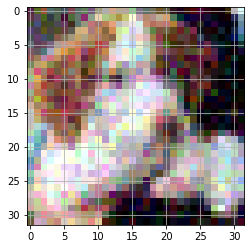

Dog 3


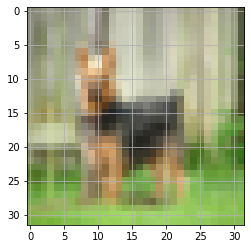

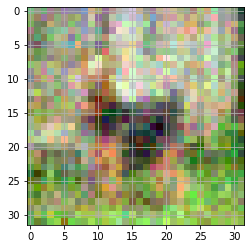

Dog 4


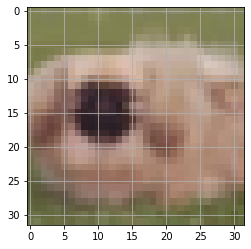

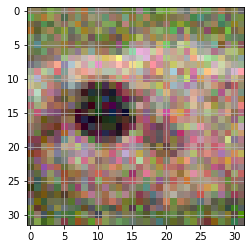

Dog 5


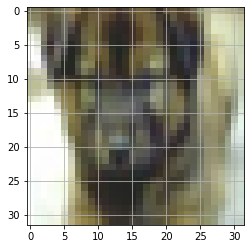

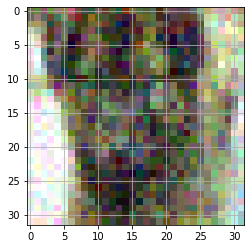

Dog 6


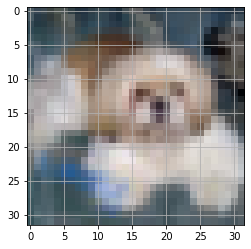

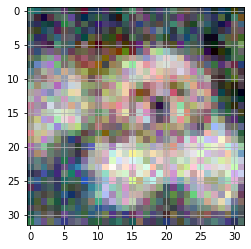

Dog 7


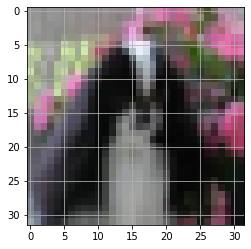

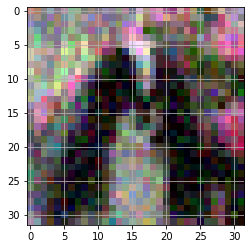

Dog 8


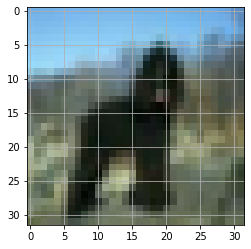

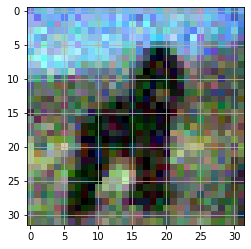

Dog 9


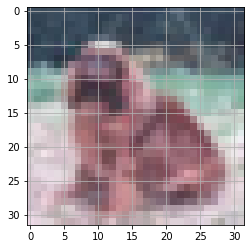

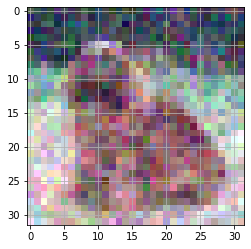

Dog 10


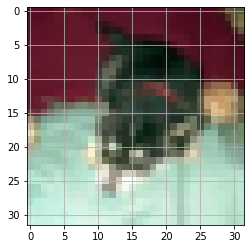

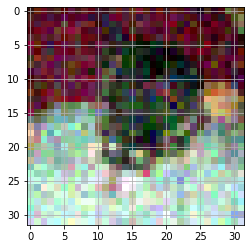

In [4]:
#1d



CDloader = torch.utils.data.DataLoader(CatDogTest, batch_size=100,
shuffle=False, num_workers=2)

dataiterCD = iter(CDloader)
imagesCD, labelsCD = dataiterCD.next()


CDloaderN = torch.utils.data.DataLoader(CatDogTestN, batch_size=100,
shuffle=False, num_workers=2)

dataiterCDN = iter(CDloaderN)
imagesCDN, labelsCDN = dataiterCDN.next()



# Unnormalises image
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.grid()
    plt.show()
    
    





#images

scale = 0.18

torch.manual_seed(1718231)




print('CATS:')   
cap=0
num=1
for j in range(100):
    if labelsCD[j]==3:
        XCD = torchvision.utils.make_grid(imagesCD[j])
        
        XN = torchvision.utils.make_grid(imagesCDN[j])
        
        print('Cat', num)
        imshow(XCD)
        imshow(XN)
        
        cap+=1
        num+=1
        if cap==10:
            break
            
            
print('DOGS:')            
            

cap=0
num=1
for j in range(100):
    if labelsCD[j]==5:
        XCD = torchvision.utils.make_grid(imagesCD[j])
        
        XN = torchvision.utils.make_grid(imagesCDN[j])
        
        print('Dog', num)
        imshow(XCD)
        imshow(XN)
        
        cap+=1
        num+=1
        if cap==10:
            break


### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values ($k_1, k_2, ..., k_7$) for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes Classifiers (NBC): one on the original features (raw pixels), and seven on PCA features with seven different dimensions in 2a, i.e., NBC on $k_1$ PCA features; NBC on $k_2$ PCA features; ..., NBC on $k_7$ PCA features. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


(10000, 3, 32, 32)
<class 'numpy.ndarray'>


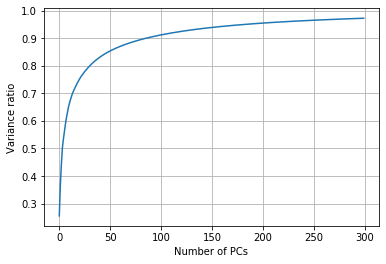

In [5]:
# Write the code for your an
#swer here. You can use multiple cells to improve readability.




np.random.seed(1718231)

#2a

import numpy as np
from sklearn.decomposition import PCA

CatDogTrainA = []
for r in range(len(CatDogTrain)):
    z = CatDogTrain[r][0].numpy()
    CatDogTrainA.append(z)
    
    
CatDogTrainA = np.asarray(CatDogTrainA)
CatDogTrainOrig = CatDogTrainA
    

CatDogTestA = []
for r in range(len(CatDogTest)):
    z = CatDogTest[r][0].numpy()
    CatDogTestA.append(z)    
    
CatDogTestA = np.asarray(CatDogTestA)
CatDogTestOrig = CatDogTestA 
    



print(CatDogTrainA.shape)
print(type(CatDogTrainA))


#PCA needs a better dimensioned input

r, h, w = CatDogTrainA.shape[1:]
CatDogTrainA = CatDogTrainA.reshape((CatDogTrainA.shape[0],CatDogTrainA.shape[1]*CatDogTrainA.shape[2]*CatDogTrainA.shape[3]))
CatDogTrainA.shape


rtest, htest, wtest = CatDogTestA.shape[1:]
CatDogTestA = CatDogTestA.reshape((CatDogTestA.shape[0],CatDogTestA.shape[1]*CatDogTestA.shape[2]*CatDogTestA.shape[3]))



features = CatDogTrainA.shape[1]


#Trial at 300 components
components = 300

pcaT = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainT = pcaT.fit_transform(CatDogTrainA)

#Explaination:

#I can see that around 97% of the variance is explained by using 250
#components, therefore we don't need any more than that, 
#Otheriwise our system would become unneccesarily slow
#Also, we have 95% explained at 200 components
#94% at 150
#92% at 100
#90% at 80
#85% at 50
#80% at 25
#Therefore, these are our choices of k


#Reference: https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe

plt.plot( np.cumsum(pcaT.explained_variance_ratio_) )
plt.xlabel('Number of PCs')
plt.ylabel('Variance ratio') 
plt.grid()

#1

components = 250

pcaK1 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK1 = pcaK1.fit_transform(CatDogTrainA)

CatDogTestK1 = pcaK1.fit_transform(CatDogTestA)



#2

components = 200

pcaK2 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK2 = pcaK2.fit_transform(CatDogTrainA)

CatDogTestK2 = pcaK2.fit_transform(CatDogTestA)




#3

components = 150

pcaK3 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK3 = pcaK3.fit_transform(CatDogTrainA)

CatDogTestK3 = pcaK3.fit_transform(CatDogTestA)



#4

components = 100

pcaK4 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK4 = pcaK4.fit_transform(CatDogTrainA)

CatDogTestK4 = pcaK4.fit_transform(CatDogTestA)



#5

components = 80

pcaK5 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK5 = pcaK5.fit_transform(CatDogTrainA)

CatDogTestK5 = pcaK5.fit_transform(CatDogTestA)


#6

components = 50

pcaK6 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK6 = pcaK6.fit_transform(CatDogTrainA)

CatDogTestK6 = pcaK6.fit_transform(CatDogTestA)



#7

components = 25

pcaK7 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK7 = pcaK7.fit_transform(CatDogTrainA)

CatDogTestK7 = pcaK7.fit_transform(CatDogTestA)





In [6]:
#2b

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for statistical data visualization

np.random.seed(1718231)

#Colour values of images are continous, therefore we will use 
#Gaussian NBC 
#Another reason why it is suitable here is because we only have 2 classes




y = np.empty(len(CatDogTrainA))
ytest = np.empty(len(CatDogTestA))


for c in range(len(CatDogTrain)):
    #cat
    if CatDogTrain[c][1]==3:
        y[c]=0
        #dog
    elif CatDogTrain[c][1]==5:
        y[c]=1


for c in range(len(CatDogTest)):
    #cat
    if CatDogTest[c][1]==3:
        ytest[c]=0
        #dog
    elif CatDogTest[c][1]==5:
        ytest[c]=1

        
        
        
        
from sklearn.naive_bayes import GaussianNB
   
        
#First NBC: Raw pixels

#

modelA = GaussianNB() 
modelA.fit(CatDogTrainA, y)

  
    
#K1


model1 = GaussianNB()

model1.fit(CatDogTrainK1, y)


#K2

model2 = GaussianNB()

model2.fit(CatDogTrainK2, y)


#K3



model3 = GaussianNB()

model3.fit(CatDogTrainK3, y)


#K4

model4 = GaussianNB()

model4.fit(CatDogTrainK4, y)


#K5


model5 = GaussianNB()

model5.fit(CatDogTrainK5, y)

#K6


model6 = GaussianNB()

model6.fit(CatDogTrainK6, y)

#K7


model7 = GaussianNB()

model7.fit(CatDogTrainK7, y)



GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy of A (original raw pixels) is:  59.35
Accuracy of K1 is:  53.349999999999994
Accuracy of K2 is:  53.400000000000006
Accuracy of K3 is:  52.800000000000004
Accuracy of K4 is:  54.65
Accuracy of K5 is:  55.1
Accuracy of K6 is:  55.900000000000006
Accuracy of K7 is:  55.75


Text(0, 0.5, 'Accuracy (%)')

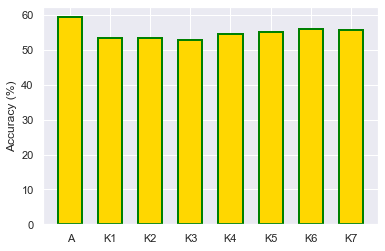

In [7]:
#2c


#First NBC Test: Raw pixels





ynew = modelA.predict(CatDogTestA)



def accuracy(yin):
    
    k=0
    for n in range(len(ytest)):
        if ytest[n]==yin[n]:
            k+=1
            
    #accuracy calculation
    acc = (k/len(ytest))*100
    
    return acc

accA = accuracy(ynew)
print('Accuracy of A (original raw pixels) is: ', accA)


#K1



ynew1 = model1.predict(CatDogTestK1)


acc1 = accuracy(ynew1)
print('Accuracy of K1 is: ', acc1)




#K2



ynew2 = model2.predict(CatDogTestK2)



acc2 = accuracy(ynew2)
print('Accuracy of K2 is: ', acc2)


#K3



ynew3 = model3.predict(CatDogTestK3)



acc3 = accuracy(ynew3)
print('Accuracy of K3 is: ', acc3)

#K4


ynew4 = model4.predict(CatDogTestK4)



acc4 = accuracy(ynew4)
print('Accuracy of K4 is: ', acc4)


#K5



ynew5 = model5.predict(CatDogTestK5)



acc5 = accuracy(ynew5)
print('Accuracy of K5 is: ', acc5)



#K6


ynew6 = model6.predict(CatDogTestK6)


acc6 = accuracy(ynew6)
print('Accuracy of K6 is: ', acc6)


#K7


ynew7 = model7.predict(CatDogTestK7)


acc7 = accuracy(ynew7)
print('Accuracy of K7 is: ', acc7)


accresults = [accA, acc1, acc2, acc3, acc4, acc5, acc6, acc7]

bases = [1, 2, 3, 4, 5, 6, 7, 8]
labels = ['A', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7']

plt.bar(x=bases, height=accresults, width=0.6, tick_label = labels, color='Gold', edgecolor='Green', linewidth=2)
plt.ylabel("Accuracy (%)")


0
1
Area under characteristic A is:  0.614666
Area under characteristic K1 is:  0.545947
Area under characteristic K2 is:  0.551126
Area under characteristic K3 is:  0.5565650000000001
Area under characteristic K4 is:  0.571723
Area under characteristic K5 is:  0.572814
Area under characteristic K6 is:  0.5798669999999999
Area under characteristic K7 is:  0.58092


Text(0, 0.5, 'Area under Characteristic')

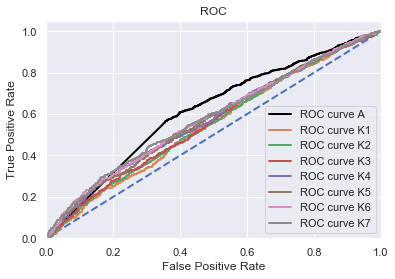

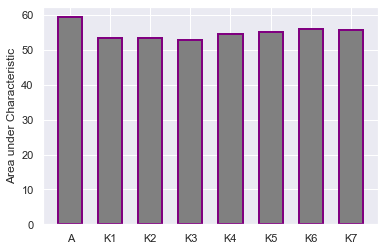

In [8]:
#2d & 2e

#Reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#Assuming positive is dog and negative is cat
from sklearn.metrics import roc_curve, auc



#
import numpy as np


#Re-format the test data 
ytestre = np.zeros([2000, 2])

for x in range(len(ytest)):
    x = int(x)
    if int(ytest[x])==1:
        ytestre[x, 1] = 1
    else:
        ytestre[x, 0] = 1
#Left is cat, right is dog



#A

fprA = {}
tprA = {}
areaA = {}

yprobA = modelA.predict_proba(CatDogTestA)




for n in range(2):
    print(n)
    fprA[n], tprA[n], _ = roc_curve(ytestre[:, n], yprobA[:, n])
    areaA[n] = auc(fprA[n], tprA[n])
    
    
fprA["micro"], tprA["micro"], _ = roc_curve(ytestre.ravel(), yprobA.ravel())
areaA["micro"] = auc(fprA["micro"], tprA["micro"])

plt.figure()
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

linew = 2
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], lw=linew, linestyle='--')



plt.plot(fprA[1], tprA[1], color='Black',
         lw=linew, label='ROC curve A' )
plt.legend(loc="lower right")



#K1

fpr1 = {}
tpr1 = {}
area1 = {}

yprob1 = model1.predict_proba(CatDogTestK1)




for n in range(2):
    
    fpr1[n], tpr1[n], _ = roc_curve(ytestre[:, n], yprob1[:, n])
    area1[n] = auc(fpr1[n], tpr1[n])
    
    
fpr1["micro"], tpr1["micro"], _ = roc_curve(ytestre.ravel(), yprob1.ravel())
area1["micro"] = auc(fpr1["micro"], tpr1["micro"])


linew = 2
plt.plot(fpr1[1], tpr1[1],
         lw=linew, label='ROC curve K1' )
plt.legend(loc="lower right")



#K2



fpr2 = {}
tpr2 = {}
area2 = {}

yprob2 = model2.predict_proba(CatDogTestK2)




for n in range(2):
    
    
    fpr2[n], tpr2[n], _ = roc_curve(ytestre[:, n], yprob2[:, n])
    area2[n] = auc(fpr2[n], tpr2[n])
    
    
fpr2["micro"], tpr2["micro"], _ = roc_curve(ytestre.ravel(), yprob2.ravel())
area2["micro"] = auc(fpr2["micro"], tpr2["micro"])


linew = 2
plt.plot(fpr2[1], tpr2[1],
         lw=linew, label='ROC curve K2' )
plt.legend(loc="lower right")

#K3



fpr3 = {}
tpr3 = {}
area3 = {}

yprob3 = model3.predict_proba(CatDogTestK3)




for n in range(2):
    
    fpr3[n], tpr3[n], _ = roc_curve(ytestre[:, n], yprob3[:, n])
    area3[n] = auc(fpr3[n], tpr3[n])
    
    
fpr3["micro"], tpr3["micro"], _ = roc_curve(ytestre.ravel(), yprob3.ravel())
area3["micro"] = auc(fpr3["micro"], tpr3["micro"])


linew = 2
plt.plot(fpr3[1], tpr3[1],
         lw=linew, label='ROC curve K3' )
plt.legend(loc="lower right")



#K4



fpr4 = {}
tpr4 = {}
area4 = {}

yprob4 = model4.predict_proba(CatDogTestK4)




for n in range(2):
    
    fpr4[n], tpr4[n], _ = roc_curve(ytestre[:, n], yprob4[:, n])
    area4[n] = auc(fpr4[n], tpr4[n])
    
    
fpr4["micro"], tpr4["micro"], _ = roc_curve(ytestre.ravel(), yprob4.ravel())
area4["micro"] = auc(fpr4["micro"], tpr4["micro"])


linew = 2
plt.plot(fpr4[1], tpr4[1],
         lw=linew, label='ROC curve K4' )
plt.legend(loc="lower right")



#K5



fpr5 = {}
tpr5 = {}
area5 = {}

yprob5 = model5.predict_proba(CatDogTestK5)




for n in range(2):
    
    fpr5[n], tpr5[n], _ = roc_curve(ytestre[:, n], yprob5[:, n])
    area5[n] = auc(fpr5[n], tpr5[n])
    
    
fpr5["micro"], tpr5["micro"], _ = roc_curve(ytestre.ravel(), yprob5.ravel())
area5["micro"] = auc(fpr5["micro"], tpr5["micro"])


linew = 2
plt.plot(fpr5[1], tpr5[1],
         lw=linew, label='ROC curve K5' )
plt.legend(loc="lower right")



#K6



fpr6 = {}
tpr6 = {}
area6 = {}

yprob6 = model6.predict_proba(CatDogTestK6)




for n in range(2):
    
    fpr6[n], tpr6[n], _ = roc_curve(ytestre[:, n], yprob6[:, n])
    area6[n] = auc(fpr6[n], tpr6[n])
    
    
fpr6["micro"], tpr6["micro"], _ = roc_curve(ytestre.ravel(), yprob6.ravel())
area6["micro"] = auc(fpr6["micro"], tpr6["micro"])


linew = 2
plt.plot(fpr6[1], tpr6[1],
         lw=linew, label='ROC curve K6' )
plt.legend(loc="lower right")



#K7



fpr7 = {}
tpr7 = {}
area7 = {}

yprob7 = model7.predict_proba(CatDogTestK7)




for n in range(2):
    
    fpr7[n], tpr7[n], _ = roc_curve(ytestre[:, n], yprob7[:, n])
    area7[n] = auc(fpr7[n], tpr7[n])
    
    
fpr7["micro"], tpr7["micro"], _ = roc_curve(ytestre.ravel(), yprob7.ravel())
area7["micro"] = auc(fpr7["micro"], tpr7["micro"])


linew = 2
plt.plot(fpr7[1], tpr7[1],
         lw=linew, label='ROC curve K7' )
plt.legend(loc="lower right")




#AUC's


print('Area under characteristic A is: ' , areaA[1])
print('Area under characteristic K1 is: ', area1[1])
print('Area under characteristic K2 is: ', area2[1])
print('Area under characteristic K3 is: ', area3[1])
print('Area under characteristic K4 is: ', area4[1])
print('Area under characteristic K5 is: ', area5[1])
print('Area under characteristic K6 is: ', area6[1])
print('Area under characteristic K7 is: ', area7[1])



arearesults = [areaA[1], area1[1], area2[1], area3[1], area4[1], area5[1], area6[1], area7[1]]

bases = [1, 2, 3, 4, 5, 6, 7, 8]
labels = ['A', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7']

plt.figure()
plt.bar(x=bases, height=accresults, width=0.6, tick_label = labels, color='Grey', edgecolor='Purple', linewidth=2)
plt.ylabel("Area under Characteristic")


<font color='Blue'>

**Answer to Question 2f)**

Observation 1: The NBC is most accurate when PCA has not been previously performed on the data. This is suprising due to the fact that PCA reduces the dimensionality of the data and therefore reduces (but does not completely eliminate) overfitting. Also, the number of PCA features has almost no effect on the accuracy of the NBC's classification.


Observation 2: The AUC of the NBC classifier is around 0.6 without previous PCA, which means that our model is finding it difficult to distinguish between cats and dogs but has still made improvements (better than a pure guess). In the presence of previous PCA, our NBC model's AUC is ranging between 0.58 and 0.54. This serves as more evidence that the PCA has made classification worse, because these AUC's are closer to 0.5, as proven by the close proximity of the curves to the diagonal line on the ROC plot.


Observation 3: We can see that the accuracy of NBC classification is the lowest for K3 (150 components). This could be because this is the number of dimensions that results in the worst level of information loss.

</font>

### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); **four Logistic Regression** classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

(10000, 3, 32, 32)
<class 'numpy.ndarray'>
Accuracy of A (original raw pixels) is:  59.5
Accuracy of K1 is:  53.2
Accuracy of K2 is:  53.55
Accuracy of K3 is:  53.800000000000004
Accuracy of K4 is:  55.00000000000001
Accuracy of K5 is:  55.15
Accuracy of K6 is:  55.50000000000001
Accuracy of K7 is:  55.7


Text(0, 0.5, 'Accuracy (%)')

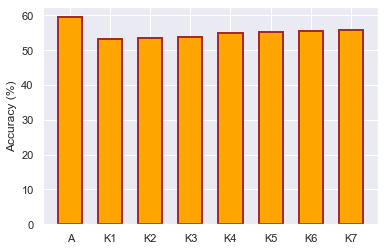

In [10]:
# Write the code for your answer here. 
#You can use multiple cells to improve readability.
#3a

np.random.seed(1718231)

#Repeat of 2a for noisy

import numpy as np
from sklearn.decomposition import PCA

CatDogTrainA = []
for r in range(len(CatDogTrainN)):
    z = CatDogTrainN[r][0].numpy()
    CatDogTrainA.append(z)
    
    
CatDogTrainA = np.asarray(CatDogTrainA)
CatDogTrainOrig = CatDogTrainA
    

CatDogTestA = []
for r in range(len(CatDogTestN)):
    z = CatDogTestN[r][0].numpy()
    CatDogTestA.append(z)    
    
CatDogTestA = np.asarray(CatDogTestA)
CatDogTestOrig = CatDogTestA 
    



print(CatDogTrainA.shape)
print(type(CatDogTrainA))


#PCA needs a better dimensioned input

r, h, w = CatDogTrainA.shape[1:]
CatDogTrainA = CatDogTrainA.reshape((CatDogTrainA.shape[0],CatDogTrainA.shape[1]*CatDogTrainA.shape[2]*CatDogTrainA.shape[3]))
CatDogTrainA.shape


rtest, htest, wtest = CatDogTestA.shape[1:]
CatDogTestA = CatDogTestA.reshape((CatDogTestA.shape[0],CatDogTestA.shape[1]*CatDogTestA.shape[2]*CatDogTestA.shape[3]))



features = CatDogTrainA.shape[1]


#Trial at 300 components
components = 300

pcaT = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainT = pcaT.fit_transform(CatDogTrainA)

#Explaination:

#I can see that around 97% of the variance is explained by using 250
#components, therefore we don't need any more than that, 
#Otheriwise our system would become unneccesarily slow
#Also, we have 95% explained at 200 components
#94% at 150
#92% at 100
#90% at 80
#85% at 50
#80% at 25
#Therefore, these are our choices of k


#Reference: https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe

plt.plot( np.cumsum(pcaT.explained_variance_ratio_) )
plt.xlabel('Number of PCs')
plt.ylabel('Variance ratio') 
plt.grid()

#1

components = 250

pcaK1 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK1 = pcaK1.fit_transform(CatDogTrainA)

CatDogTestK1 = pcaK1.fit_transform(CatDogTestA)



#2

components = 200

pcaK2 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK2 = pcaK2.fit_transform(CatDogTrainA)

CatDogTestK2 = pcaK2.fit_transform(CatDogTestA)




#3

components = 150

pcaK3 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK3 = pcaK3.fit_transform(CatDogTrainA)

CatDogTestK3 = pcaK3.fit_transform(CatDogTestA)



#4

components = 100

pcaK4 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK4 = pcaK4.fit_transform(CatDogTrainA)

CatDogTestK4 = pcaK4.fit_transform(CatDogTestA)



#5

components = 80

pcaK5 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK5 = pcaK5.fit_transform(CatDogTrainA)

CatDogTestK5 = pcaK5.fit_transform(CatDogTestA)


#6

components = 50

pcaK6 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK6 = pcaK6.fit_transform(CatDogTrainA)

CatDogTestK6 = pcaK6.fit_transform(CatDogTestA)



#7

components = 25

pcaK7 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(CatDogTrainA)

CatDogTrainK7 = pcaK7.fit_transform(CatDogTrainA)

CatDogTestK7 = pcaK7.fit_transform(CatDogTestA)



#Repeat 2b for noisy

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for statistical data visualization

np.random.seed(1718231)

#Colour values of images are continous, therefore we will use 
#Gaussian NBC 
#Another reason why it is suitable here is because we only have 2 classes




y = np.empty(len(CatDogTrainA))
ytest = np.empty(len(CatDogTestA))


for c in range(len(CatDogTrainN)):
    #cat
    if CatDogTrain[c][1]==3:
        y[c]=0
        #dog
    elif CatDogTrain[c][1]==5:
        y[c]=1


for c in range(len(CatDogTestN)):
    #cat
    if CatDogTest[c][1]==3:
        ytest[c]=0
        #dog
    elif CatDogTest[c][1]==5:
        ytest[c]=1

        
        
        
        
from sklearn.naive_bayes import GaussianNB
   
        
#First NBC: Raw pixels

#

modelA = GaussianNB() 
modelA.fit(CatDogTrainA, y)

  
    
#K1


model1 = GaussianNB()

model1.fit(CatDogTrainK1, y)


#K2

model2 = GaussianNB()

model2.fit(CatDogTrainK2, y)


#K3



model3 = GaussianNB()

model3.fit(CatDogTrainK3, y)


#K4

model4 = GaussianNB()

model4.fit(CatDogTrainK4, y)


#K5


model5 = GaussianNB()

model5.fit(CatDogTrainK5, y)

#K6


model6 = GaussianNB()

model6.fit(CatDogTrainK6, y)

#K7


model7 = GaussianNB()

model7.fit(CatDogTrainK7, y)


#Repeat 2c for noisy


#First NBC Test: Raw pixels





ynew = modelA.predict(CatDogTestA)



def accuracy(yin):
    
    k=0
    for n in range(len(ytest)):
        if ytest[n]==yin[n]:
            k+=1
            
    #accuracy calculation
    acc = (k/len(ytest))*100
    
    return acc

accA = accuracy(ynew)
print('Accuracy of A (original raw pixels) is: ', accA)


#K1



ynew1 = model1.predict(CatDogTestK1)


acc1 = accuracy(ynew1)
print('Accuracy of K1 is: ', acc1)




#K2



ynew2 = model2.predict(CatDogTestK2)



acc2 = accuracy(ynew2)
print('Accuracy of K2 is: ', acc2)


#K3



ynew3 = model3.predict(CatDogTestK3)



acc3 = accuracy(ynew3)
print('Accuracy of K3 is: ', acc3)

#K4


ynew4 = model4.predict(CatDogTestK4)



acc4 = accuracy(ynew4)
print('Accuracy of K4 is: ', acc4)


#K5



ynew5 = model5.predict(CatDogTestK5)



acc5 = accuracy(ynew5)
print('Accuracy of K5 is: ', acc5)



#K6


ynew6 = model6.predict(CatDogTestK6)


acc6 = accuracy(ynew6)
print('Accuracy of K6 is: ', acc6)


#K7


ynew7 = model7.predict(CatDogTestK7)


acc7 = accuracy(ynew7)
print('Accuracy of K7 is: ', acc7)


accresults = [accA, acc1, acc2, acc3, acc4, acc5, acc6, acc7]

bases = [1, 2, 3, 4, 5, 6, 7, 8]
labels = ['A', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7']

plt.bar(x=bases, height=accresults, width=0.6, tick_label = labels, color='Orange', edgecolor='Brown', linewidth=2)
plt.ylabel("Accuracy (%)")





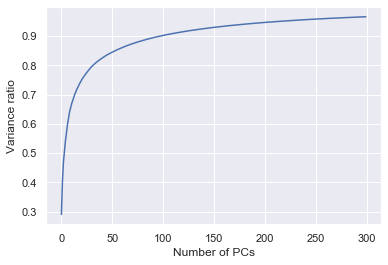

In [62]:
#3b


np.random.seed(1718231)


#2a

import numpy as np
from sklearn.decomposition import PCA

trainsetA = []
for r in range(len(trainset)):
    z = trainset[r][0].numpy()
    trainsetA.append(z)
    
    
trainsetA = np.asarray(trainsetA)
trainsetOrig = trainsetA
    

testsetA = []
for r in range(len(testset)):
    z = testset[r][0].numpy()
    testsetA.append(z)    
    
testsetA = np.asarray(testsetA)
testsetOrig = testsetA 


#PCA needs a better dimensioned input

r, h, w = trainsetA.shape[1:]
trainsetA = trainsetA.reshape((trainsetA.shape[0],trainsetA.shape[1]*trainsetA.shape[2]*trainsetA.shape[3]))
trainsetA.shape


rtest, htest, wtest = testsetA.shape[1:]
testsetA = testsetA.reshape((testsetA.shape[0],testsetA.shape[1]*testsetA.shape[2]*testsetA.shape[3]))




#Trial at 300 components
components = 300

pcaT = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(trainsetA)

trainsetT = pcaT.fit_transform(trainsetA)

plt.plot( np.cumsum(pcaT.explained_variance_ratio_) )
plt.xlabel('Number of PCs')
plt.ylabel('Variance ratio') 
#plt.grid()

#Explaination:

#I can see that around 97% of the variance is explained by using 250
#components, therefore we don't need any more than that, 
#Otheriwise our system would become unneccesarily slow
#90% at 100
#78% at 25
#Therefore, these are our choices of k


#K1
components = 250

pcaK1 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(trainsetA)

trainsetK1 = pcaK1.fit_transform(trainsetA)

testsetK1 = pcaK1.fit_transform(testsetA)

#K2
components = 100

pcaK2 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(trainsetA)

trainsetK2 = pcaK2.fit_transform(trainsetA)

testsetK2 = pcaK2.fit_transform(testsetA)

#K3
components = 25

pcaK3 = PCA(n_components=components, svd_solver='randomized',
          whiten=True).fit(trainsetA)

trainsetK3 = pcaK3.fit_transform(trainsetA)

testsetK3 = pcaK3.fit_transform(testsetA)
    

In [21]:
print(y[40000:40020])

[1. 8. 5. 1. 5. 7. 4. 3. 8. 2. 7. 2. 0. 1. 5. 9. 6. 2. 0. 8.]


In [63]:
#3c

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for statistical data visualization

np.random.seed(1718231)

#Colour values of images are continous, therefore we will use 
#Gaussian NBC 
#Another reason why it is suitable here is because we only have 2 classes


y = np.empty(len(trainsetA))
ytest = np.empty(len(testsetA))


for c in range(len(trainset)):
    y[c]= trainset[c][1]
    

for c in range(len(testset)):
    ytest[c]= testset[c][1]



from sklearn.naive_bayes import GaussianNB
   
#NBC's        
#First NBC: Raw pixels

#
import time

start = time.time()

modelA = GaussianNB() 
modelA.fit(trainsetA, y)

end = time.time()
TMtrainVA   =  end - start  
    
#K1

start = time.time()

model1 = GaussianNB()
model1.fit(trainsetK1, y)

end = time.time()
TMtrainV1   =  end - start 

#K2

start = time.time()

model2 = GaussianNB()

model2.fit(trainsetK2, y)

end = time.time()
TMtrainV2   =  end - start 


#K3

start = time.time()


model3 = GaussianNB()

model3.fit(trainsetK3, y)

end = time.time()
TMtrainV3   =  end - start 



In [64]:
#3c Part 2

#Logistic Regression
#Reference: https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
from sklearn.linear_model import LogisticRegression
#A

start = time.time()

regressA = LogisticRegression(solver='lbfgs', max_iter=260)  
regressA.fit(trainsetA, y)

end = time.time()
TMtrainQA   =  end - start 

#K1
start = time.time()

regress1 = LogisticRegression(solver='lbfgs', max_iter=260)  
regress1.fit(trainsetK1, y)

end = time.time()
TMtrainQ1   =  end - start 

#K2
start = time.time()

regress2 = LogisticRegression(solver='lbfgs', max_iter=260)  
regress2.fit(trainsetK2, y)

end = time.time()
TMtrainQ2   =  end - start 

#K3
start = time.time()

regress3 = LogisticRegression(solver='lbfgs', max_iter=260)  
regress3.fit(trainsetK3, y)

end = time.time()
TMtrainQ3   =  end - start 


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

In [65]:
#3c Part 3: Convolutional Neural Network

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F


#CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


#Loss function & Optimiser
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


#Training 

start = time.time()

for epoch in range(2):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data

        
        optimizer.zero_grad()

        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        
        running_loss += loss.item()
        if i % 2000 == 1999:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

end = time.time()
TMtrainH   =  end - start 


[1,  2000] loss: 2.112
[1,  4000] loss: 1.803
[1,  6000] loss: 1.622
[1,  8000] loss: 1.540
[1, 10000] loss: 1.469
[1, 12000] loss: 1.433
[2,  2000] loss: 1.372
[2,  4000] loss: 1.342
[2,  6000] loss: 1.297
[2,  8000] loss: 1.300
[2, 10000] loss: 1.272
[2, 12000] loss: 1.268
Finished Training


In [66]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


net = Net()
net.load_state_dict(torch.load(PATH))






<All keys matched successfully>

In [67]:
#3d: Testing

#NBC Denoted by 'V':

#NBC A
start = time.time()

ypredVA = modelA.predict(testsetA)

end = time.time()
TMtestVA   =  end - start 


accVA = (modelA.score(testsetA, ytest))*100
print('Accuracy of A (original raw pixels) is: ', accVA, '%')


#NBC K1

start = time.time()


ypredV1 = model1.predict(testsetK1)


end = time.time()
TMtestV1   =  end - start 

accV1 = (model1.score(testsetK1, ytest))*100
print('Accuracy of K1 is: ', accV1, '%')



#NBC K2

start = time.time()

ypredV2 = model2.predict(testsetK2)

end = time.time()
TMtestV2   =  end - start 


accV2 = (model2.score(testsetK2, ytest))*100
print('Accuracy of K2 is: ', accV2, '%')



#NBC K3
start = time.time()

ypredV3 = model3.predict(testsetK3)

end = time.time()
TMtestV3   =  end - start 

accV3 = (model3.score(testsetK3, ytest))*100
print('Accuracy of K3 is: ', accV3, '%')



#Logistic Regression denoted by 'Q':

#Logistic Regression A

start = time.time()

ypredQA = regressA.predict(testsetA)

end = time.time()
TMtestQA   =  end - start 

accQA = (regressA.score(testsetA, ytest))*100
print('Accuracy of A (original raw pixels) is: ', accQA, '%')

#Logistic Regression K1

start = time.time()

ypredQ1 = regress1.predict(testsetK1)

end = time.time()
TMtestQ1   =  end - start 

accQ1 = (regress1.score(testsetK1, ytest))*100
print('Accuracy of K1 is: ', accQ1, '%')


#Logistic Regression K2

start = time.time()

ypredQ2 = regress2.predict(testsetK2)

end = time.time()
TMtestQ2   =  end - start 

accQ2 = (regress2.score(testsetK2, ytest))*100
print('Accuracy of K2 is: ', accQ2, '%')


#Logistic Regression K3

start = time.time()

ypredQ3 = regress3.predict(testsetK3)

end = time.time()
TMtestQ3   =  end - start 

accQ3 = (regress3.score(testsetK3, ytest))*100
print('Accuracy of K3 is: ', accQ3, '%')




Accuracy of A (original raw pixels) is:  29.759999999999998 %
Accuracy of K1 is:  21.990000000000002 %
Accuracy of K2 is:  23.43 %
Accuracy of K3 is:  26.900000000000002 %
Accuracy of A (original raw pixels) is:  38.39 %
Accuracy of K1 is:  19.77 %
Accuracy of K2 is:  20.14 %
Accuracy of K3 is:  22.84 %


In [139]:
sum().item?

Object `item` not found.


In [146]:
predicted, labelsX

(tensor([3, 5, 4, 7]), tensor([3, 5, 1, 7]))

In [156]:
#CNN denoted by 'H':

#CNN


correct = 0
total = 0

start = time.time()
ypredH = []
ytestH = []

with torch.no_grad():  
    for data in testloader:
        images, labelsX = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labelsX.size(0)
        correct += (predicted == labelsX).sum().item()
        #Save predicted and actual labels for use later:
        for f in range(len(labelsX)):
            ypredH.append(predicted[f].item())
            ytestH.append(labelsX[f].item())
        
        
end = time.time()
TMtestH   =  end - start        

        

accH = 100 * (correct / total )       
      
print('Accuracy of the network on the 10000 test images: ', accH, '%')




Accuracy of the network on the 10000 test images:  56.47 %


V is NBC, 
, Q is Logistic Regression,
 CNN is CNN


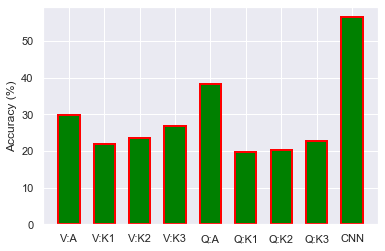

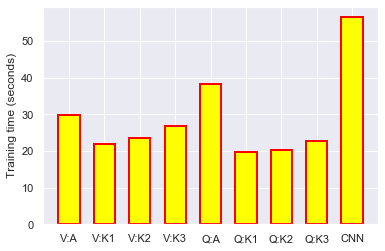

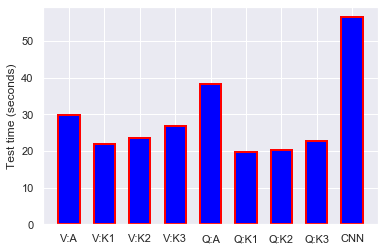

In [78]:
#Accuracy

plt.figure()
accresults = [accVA, accV1, accV2, accV3, accQA, accQ1, accQ2, accQ3, accH]

bases = [1, 2, 3, 4, 5, 6, 7, 8, 9]
labels = ['V:A', 'V:K1', 'V:K2', 'V:K3', 'Q:A', 'Q:K1', 'Q:K2', 'Q:K3', 'CNN']

plt.bar(x=bases, height=accresults, width=0.6, tick_label = labels, color='Green', edgecolor='Red', linewidth=2)
plt.ylabel("Accuracy (%)")


#Training time

plt.figure()
TMtrainresults = [TMtrainVA, TMtrainV1, TMtrainV2, TMtrainV3, TMtrainQA, TMtrainQ1, TMtrainQ2, TMtrainQ3, TMtrainH]

bases = [1, 2, 3, 4, 5, 6, 7, 8, 9]
labels = ['V:A', 'V:K1', 'V:K2', 'V:K3', 'Q:A', 'Q:K1', 'Q:K2', 'Q:K3', 'CNN']

plt.bar(x=bases, height=accresults, width=0.6, tick_label = labels, color='Yellow', edgecolor='Red', linewidth=2)
plt.ylabel("Training time (seconds)")



#Test time

plt.figure()
TMtestresults = [TMtestVA, TMtestV1, TMtestV2, TMtestV3, TMtestQA, TMtestQ1, TMtestQ2, TMtestQ3, TMtestH]

bases = [1, 2, 3, 4, 5, 6, 7, 8, 9]
labels = ['V:A', 'V:K1', 'V:K2', 'V:K3', 'Q:A', 'Q:K1', 'Q:K2', 'Q:K3', 'CNN']
plt.bar(x=bases, height=accresults, width=0.6, tick_label = labels, color='Blue', edgecolor='Red', linewidth=2)
plt.ylabel("Test time (seconds)")


print('V is NBC, \n, Q is Logistic Regression,\n CNN is CNN')



[[494  20  39  10  84  34  50   9 200  60]
 [141 166  24  31  66  72 192  19 121 168]
 [225  24  83  15 292  48 209  21  54  29]
 [163  36  54  76 151 129 262  26  34  69]
 [ 86   8  57  26 417  38 265  22  50  31]
 [156  17  55  51 167 264 159  36  57  38]
 [106   2  60  18 228  46 467  15  19  39]
 [134  24  36  41 228  94 102 131  72 138]
 [168  41  18  17  56  83  39   8 471  99]
 [144  67  17  20  48  32 101  23 141 407]]


Text(0.5, 1, 'Confusion Matrix for CNN \n')

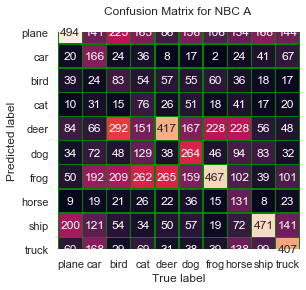

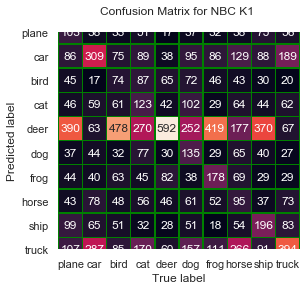

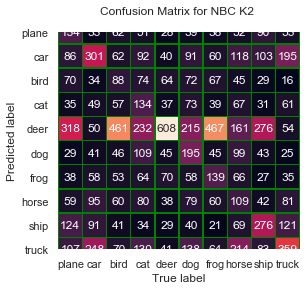

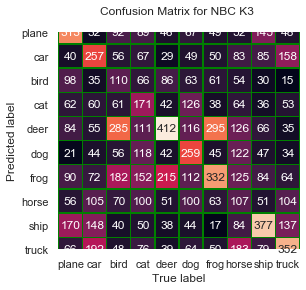

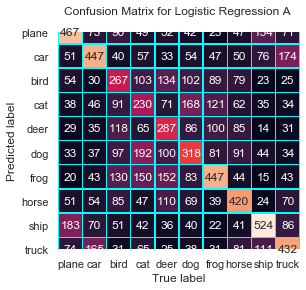

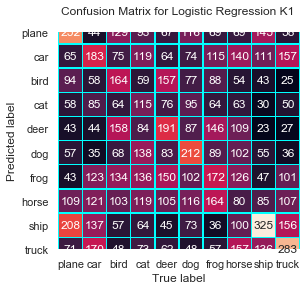

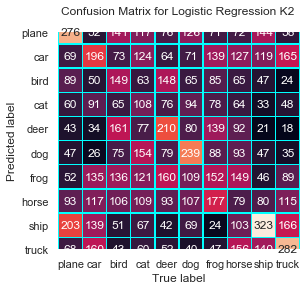

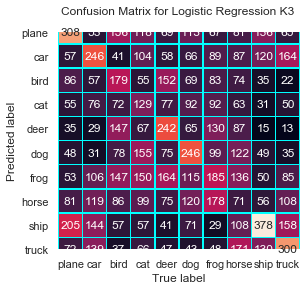

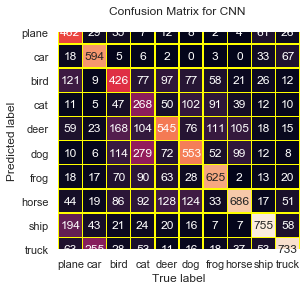

In [157]:
#3e

import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 
           'frog', 'horse', 'ship', 'truck')


#NBC A

cmatVA = confusion_matrix(ytest, ypredVA)
plt.figure()

sns.heatmap(cmatVA.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=classes, yticklabels=classes, linecolor='Green',
           linewidths='0.4')

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix for NBC A \n')
print(cmatVA)


#NBC K1

cmatV1 = confusion_matrix(ytest, ypredV1)
plt.figure()

sns.heatmap(cmatV1.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=classes, yticklabels=classes, linecolor='Green',
           linewidths='0.4')

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix for NBC K1 \n')


#NBC K2

cmatV2 = confusion_matrix(ytest, ypredV2)
plt.figure()

sns.heatmap(cmatV2.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=classes, yticklabels=classes, linecolor='Green',
           linewidths='0.4')

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix for NBC K2 \n')

#NBC K3

cmatV3 = confusion_matrix(ytest, ypredV3)
plt.figure()

sns.heatmap(cmatV3.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=classes, yticklabels=classes, linecolor='Green',
           linewidths='0.4')

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix for NBC K3 \n')


#Logistic Regression A

cmatQA = confusion_matrix(ytest, ypredQA)
plt.figure()

sns.heatmap(cmatQA.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=classes, yticklabels=classes, linecolor='Cyan',
           linewidths='0.4')

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression A \n')


#Logistic Regression K1

cmatQ1 = confusion_matrix(ytest, ypredQ1)
plt.figure()

sns.heatmap(cmatQ1.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=classes, yticklabels=classes, linecolor='Cyan',
           linewidths='0.4')

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression K1 \n')


#Logistic Regression K2

cmatQ2 = confusion_matrix(ytest, ypredQ2)
plt.figure()

sns.heatmap(cmatQ2.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=classes, yticklabels=classes, linecolor='Cyan',
           linewidths='0.4')

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression K2 \n')


#Logistic Regression K3

cmatQ3 = confusion_matrix(ytest, ypredQ3)
plt.figure()

sns.heatmap(cmatQ3.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=classes, yticklabels=classes, linecolor='Cyan',
           linewidths='0.4')

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix for Logistic Regression K3 \n')


#CNN

cmatH = confusion_matrix(ytestH, ypredH)
plt.figure()

sns.heatmap(cmatH.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=classes, yticklabels=classes, linecolor='Yellow',
           linewidths='0.4')

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix for CNN \n')





<font color='Blue'>

**Answer to Question 3f)**

Observation 1: Looking at the accuracy bar graph, we notice here that PCA has decreased the accuracy of both NBC and Logistic Regression (LR). However, the lower the amount of principal components, the higher the accuracy (but still much lower than without PCA). 

Observation 2: Looking again at the accuracy bar graph, we notice that CNN is much more accurate than LR, which is more accurate than NBC. CNN is more accurate than LR because CNN is more suited to the classifcation of data with many inputs (such as images) and LR is susceptible to overfitting. LR performs better than NBC because NBC makes very strong assumptions that lead to inaccuracy.

Observation 3: Looking as the confusion matrices, we can see that the LR and CNN models most accurately identify ships, whilst the NBC most accurately identifies deers. These differences can be attributed to the different operations involved in the machine learning of the different classifiers.


</font>






### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [168]:
# Write the code for your answer here. 
#You can use multiple cells to improve readability.

#4a

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # ****3**** input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3 , 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


    


In [248]:
#4b




myAE=Autoencoder()


#Hyperparameters for training
batch_size=64
learning_rate=1e-3
max_epochs = 1

#Set the random seed for reproducibility 
torch.manual_seed(1718231) 
#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shffling)

Aloader = torch.utils.data.DataLoader(trainsetN, batch_size=1,
shuffle=False)





    
        

#Storage
outputs = []
X=0

losslist = []

#Start training
for epoch in range(max_epochs):
    X=0 
    for data in Aloader:
        imgN, label = data
        optimizer.zero_grad()
        recon = myAE(imgN)
        
        imgB = torch.empty(1,3,32,32)

        imgB[0] = trainset[X][0]
    
         
        loss = criterion(recon, imgB)
        losslist.append(loss.item())
        loss.backward()
        optimizer.step()
        X+=1
    if (epoch % 1) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, imgB, recon),)


Epoch:1, Loss:0.1463


In [251]:
#4c

Tloader = torch.utils.data.DataLoader(testsetN, batch_size=1,
shuffle=False)

lossdic = {}
losslist=[]

M=0
for data in Tloader:
    
    imgN, label = data
    
    recon = myAE(imgN)
        
    imgB = torch.empty(1,3,32,32)

    imgB[0] = testset[M][0]
    
         
    loss = criterion(recon, imgB)
    
    losslist.append(loss.item())
    
    lossdic[M] = loss.item()
    
    M+=1

    



Noisy image ranked number  1
(this first one is the noisiest)


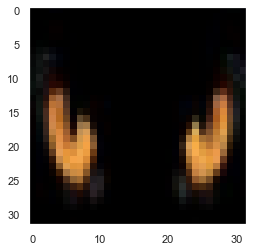

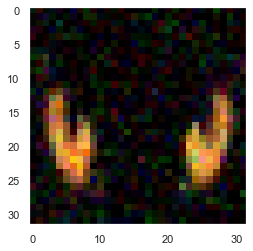


Noisy image ranked number  2


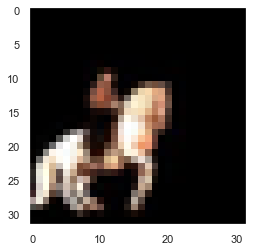

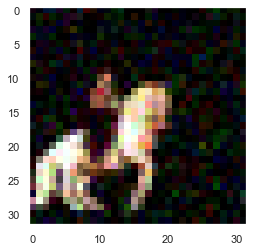


Noisy image ranked number  3


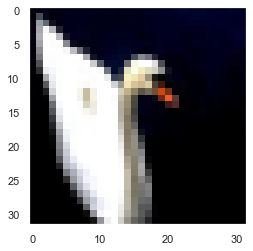

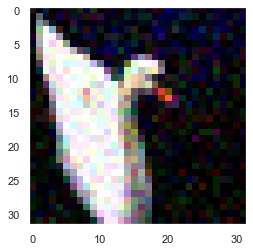


Noisy image ranked number  4


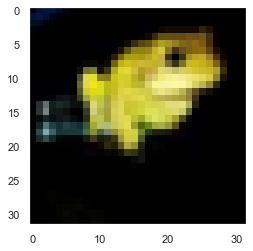

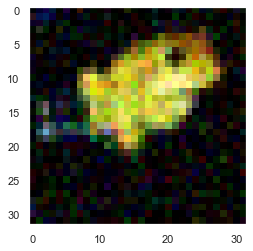


Noisy image ranked number  5


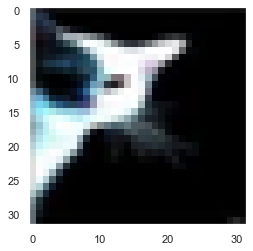

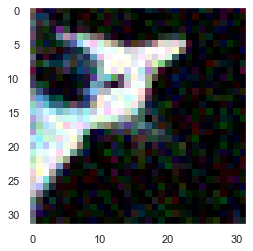


Noisy image ranked number  6


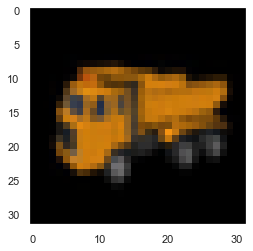

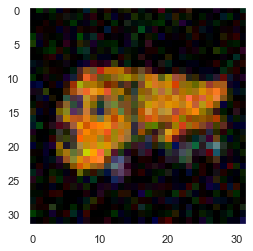


Noisy image ranked number  7


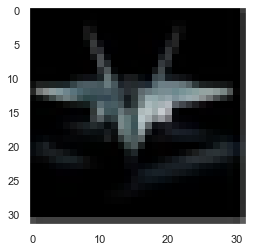

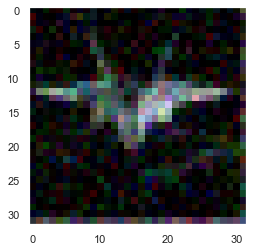


Noisy image ranked number  8


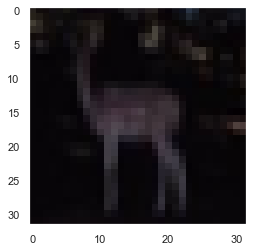

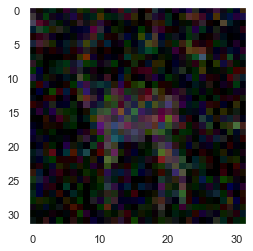


Noisy image ranked number  9


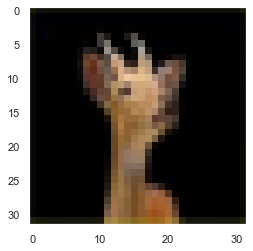

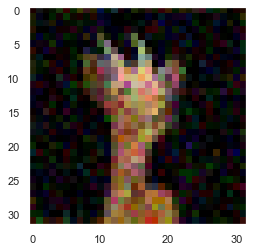


Noisy image ranked number  10


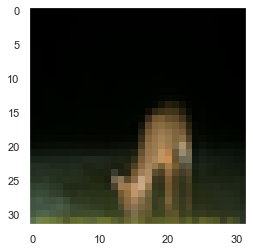

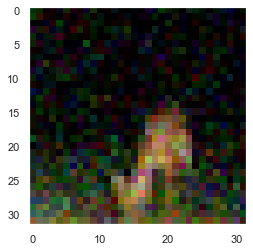


Noisy image ranked number  11


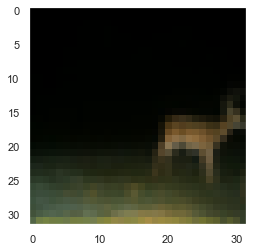

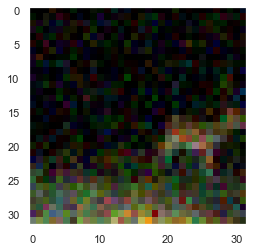


Noisy image ranked number  12


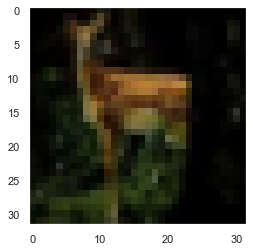

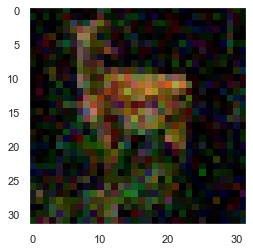


Noisy image ranked number  13


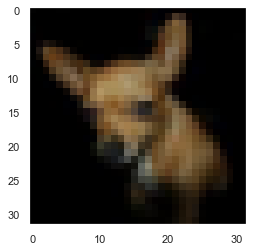

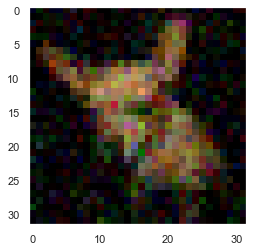


Noisy image ranked number  14


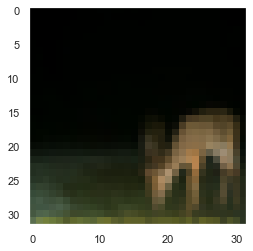

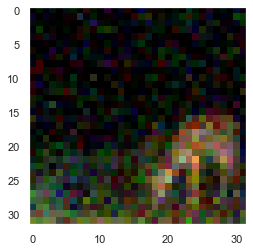


Noisy image ranked number  15


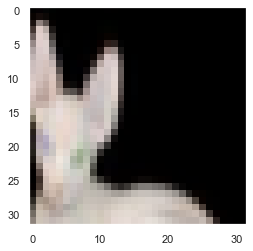

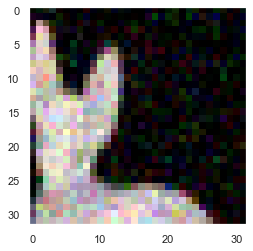


Noisy image ranked number  16


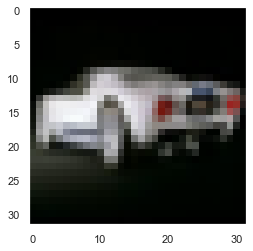

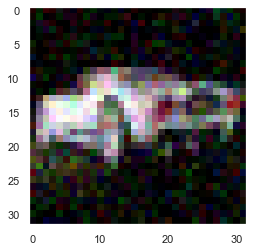


Noisy image ranked number  17


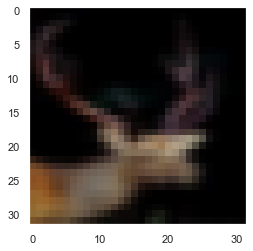

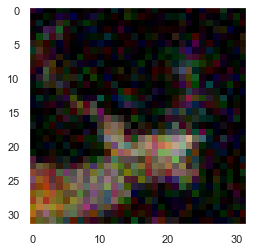


Noisy image ranked number  18


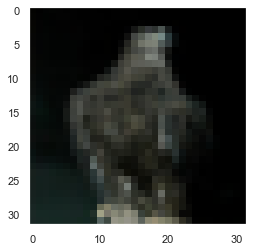

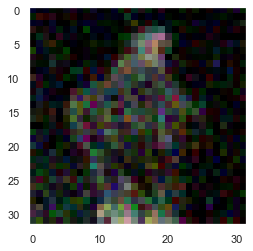


Noisy image ranked number  19


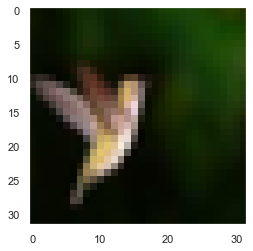

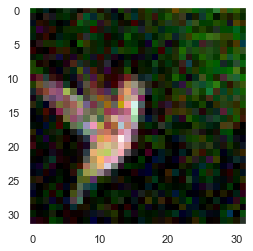


Noisy image ranked number  20


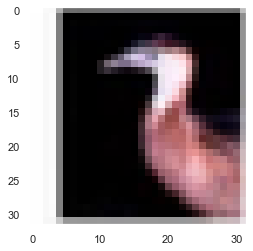

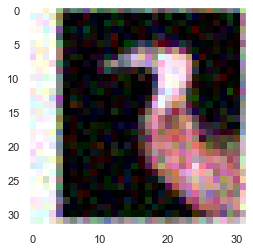


Noisy image ranked number  21


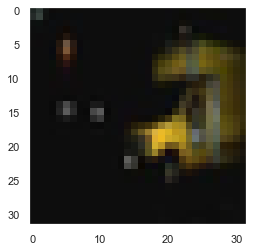

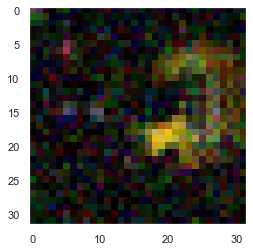


Noisy image ranked number  22


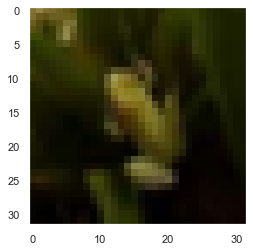

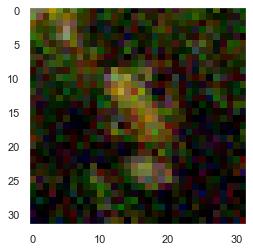


Noisy image ranked number  23


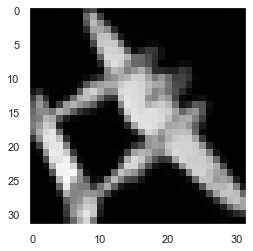

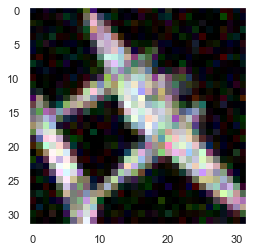


Noisy image ranked number  24


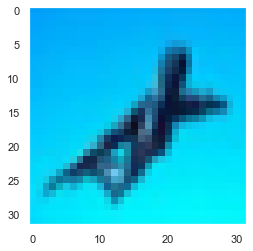

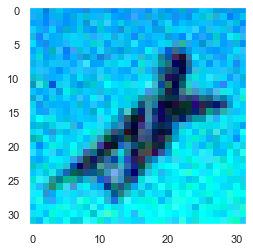


Noisy image ranked number  25


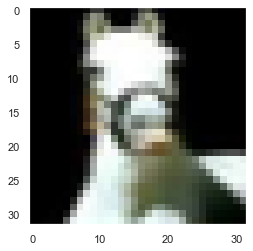

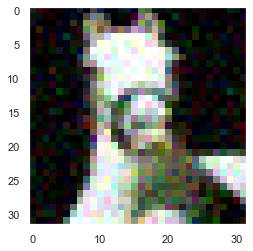


Noisy image ranked number  26


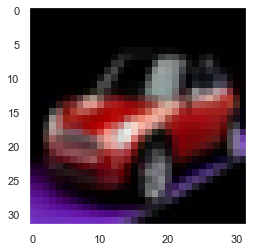

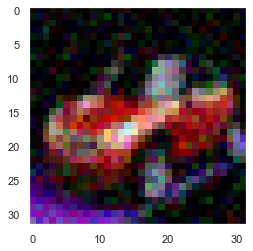


Noisy image ranked number  27


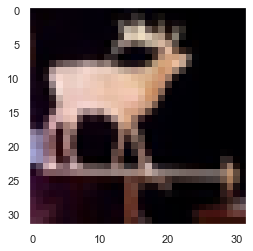

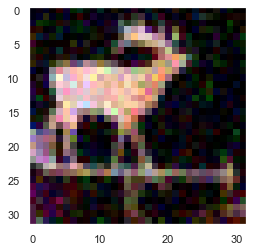


Noisy image ranked number  28


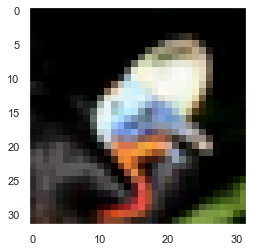

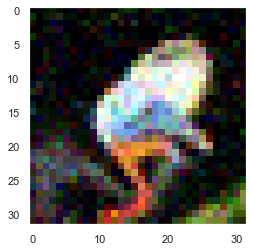


Noisy image ranked number  29


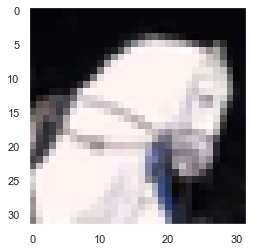

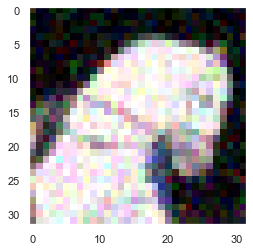


Noisy image ranked number  30


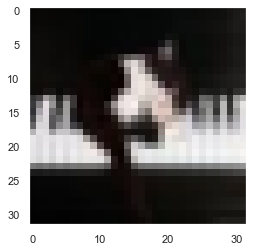

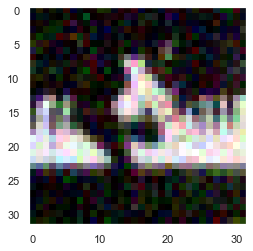

In [252]:
#4c part 2

lossorder= sorted(lossdic, key=lambda p:lossdic[p], reverse=True)

noisy30 = lossorder[0:30]

meanlossOrig = np.mean(losslist)

def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.grid()
    plt.show()
    

    
    
rank=1
for d in noisy30:
    
    U = torchvision.utils.make_grid(testset[d][0])
    UN = torchvision.utils.make_grid(testsetN[d][0])
    
    print('\nNoisy image ranked number ', rank)
    if rank==1:
        print('(this first one is the noisiest)')
    
    imshow(U)
    imshow(UN)
    
    
    
    rank+=1
    

In [253]:
#4d



#The hyperperameters we will vary are the max 
#number of epoch's and the learning rate

#test 1
lr2 = 1e-2
#test 2
lr3=1e-1
#test 3
lr4=10

#test 4
maxe2 = 2
#test 5
maxe3 = 3
#test 6
maxe4 = 4



#test 1
myAE=Autoencoder()

#Hyperparameters for training
batch_size=64
learning_rate=lr2
max_epochs = 1

#Set the random seed for reproducibility 
torch.manual_seed(1718231) 
#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shffling)

Aloader = torch.utils.data.DataLoader(trainsetN, batch_size=1,
shuffle=False)


#Storage
outputs = []
X=0



#Start training
for epoch in range(max_epochs):
    X=0 
    for data in Aloader:
        imgN, label = data
        optimizer.zero_grad()
        recon = myAE(imgN)
        
        imgB = torch.empty(1,3,32,32)

        imgB[0] = trainset[X][0]
    
         
        loss = criterion(recon, imgB)
        losslist.append(loss.item())
        loss.backward()
        optimizer.step()
        X+=1
    if (epoch % 1) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, imgB, recon),)

####

####


Tloader = torch.utils.data.DataLoader(testsetN, batch_size=1,
shuffle=False)


losslist=[]

M=0
for data in Tloader:
    
    imgN, label = data
    
    recon = myAE(imgN)
        
    imgB = torch.empty(1,3,32,32)

    imgB[0] = testset[M][0]
    
         
    loss = criterion(recon, imgB)
    losslist.append(loss.item())
    
    
    M+=1

meanloss1 = np.mean(losslist)    

print('Mean loss: ', meanloss1)


Epoch:1, Loss:0.2081
Mean loss:  0.25463800361938776


In [254]:
#test 2
myAE=Autoencoder()


#Hyperparameters for training
batch_size=64
learning_rate=lr3
max_epochs = 1

#Set the random seed for reproducibility 
torch.manual_seed(1718231) 
#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shffling)

Aloader = torch.utils.data.DataLoader(trainsetN, batch_size=1,
shuffle=False)


#Storage
outputs = []
X=0



#Start training
for epoch in range(max_epochs):
    X=0 
    for data in Aloader:
        imgN, label = data
        optimizer.zero_grad()
        recon = myAE(imgN)
        
        imgB = torch.empty(1,3,32,32)

        imgB[0] = trainset[X][0]
    
         
        loss = criterion(recon, imgB)
        
        loss.backward()
        optimizer.step()
        X+=1
    if (epoch % 1) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, imgB, recon),)

####

####


Tloader = torch.utils.data.DataLoader(testsetN, batch_size=1,
shuffle=False)

losslist=[]

M=0
for data in Tloader:
    
    imgN, label = data
    
    recon = myAE(imgN)
        
    imgB = torch.empty(1,3,32,32)

    imgB[0] = testset[M][0]
    
         
    loss = criterion(recon, imgB)
    losslist.append(loss.item())
 
    
    
    M+=1

meanloss2 = np.mean(losslist)
print('Mean loss: ', meanloss2)




Epoch:1, Loss:0.4558
Mean loss:  0.544506292001903


In [255]:
#test 3
myAE=Autoencoder()

#Hyperparameters for training
batch_size=64
learning_rate=lr4
max_epochs = 1

#Set the random seed for reproducibility 
torch.manual_seed(1718231) 
#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shffling)

Aloader = torch.utils.data.DataLoader(trainsetN, batch_size=1,
shuffle=False)


#Storage
outputs = []
X=0



#Start training
for epoch in range(max_epochs):
    X=0 
    for data in Aloader:
        imgN, label = data
        optimizer.zero_grad()
        recon = myAE(imgN)
        
        imgB = torch.empty(1,3,32,32)

        imgB[0] = trainset[X][0]
    
         
        loss = criterion(recon, imgB)
        
        loss.backward()
        optimizer.step()
        X+=1
    if (epoch % 1) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, imgB, recon),)

####

####


Tloader = torch.utils.data.DataLoader(testsetN, batch_size=1,
shuffle=False)


losslist=[]

M=0
for data in Tloader:
    
    imgN, label = data
    
    recon = myAE(imgN)
        
    imgB = torch.empty(1,3,32,32)

    imgB[0] = testset[M][0]
    
         
    loss = criterion(recon, imgB)
    losslist.append(loss.item())
    
    
    M+=1

meanloss3 = np.mean(losslist)
print('Mean loss: ', meanloss3)



Epoch:1, Loss:0.4407
Mean loss:  0.5276380099460483


In [256]:
#test 4
myAE=Autoencoder()

#Hyperparameters for training
batch_size=64
learning_rate=1e-3
max_epochs = maxe2

#Set the random seed for reproducibility 
torch.manual_seed(1718231) 
#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shffling)

Aloader = torch.utils.data.DataLoader(trainsetN, batch_size=1,
shuffle=False)


#Storage
outputs = []
X=0



#Start training
for epoch in range(max_epochs):
    X=0 
    for data in Aloader:
        imgN, label = data
        optimizer.zero_grad()
        recon = myAE(imgN)
        
        imgB = torch.empty(1,3,32,32)

        imgB[0] = trainset[X][0]
    
         
        loss = criterion(recon, imgB)
        
        loss.backward()
        optimizer.step()
        X+=1
    if (epoch % 1) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, imgB, recon),)

####

####


Tloader = torch.utils.data.DataLoader(testsetN, batch_size=1,
shuffle=False)


losslist=[]

M=0
for data in Tloader:
    
    imgN, label = data
    
    recon = myAE(imgN)
        
    imgB = torch.empty(1,3,32,32)

    imgB[0] = testset[M][0]
    
         
    loss = criterion(recon, imgB)
    losslist.append(loss.item())
    
    
    M+=1

meanloss4 = np.mean(losslist)
print('Mean loss: ', meanloss4)



Epoch:1, Loss:0.1471
Epoch:2, Loss:0.1549
Mean loss:  0.20308937826287002


In [257]:
#test 5
myAE=Autoencoder()

#Hyperparameters for training
batch_size=64
learning_rate=1e-3
max_epochs = maxe3

#Set the random seed for reproducibility 
torch.manual_seed(1718231) 
#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shffling)

Aloader = torch.utils.data.DataLoader(trainsetN, batch_size=1,
shuffle=False)


#Storage
outputs = []
X=0



#Start training
for epoch in range(max_epochs):
    X=0 
    for data in Aloader:
        imgN, label = data
        optimizer.zero_grad()
        recon = myAE(imgN)
        
        imgB = torch.empty(1,3,32,32)

        imgB[0] = trainset[X][0]
    
         
        loss = criterion(recon, imgB)
        
        loss.backward()
        optimizer.step()
        X+=1
    if (epoch % 1) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, imgB, recon),)

####

####


Tloader = torch.utils.data.DataLoader(testsetN, batch_size=1,
shuffle=False)


losslist=[]

M=0
for data in Tloader:
    
    imgN, label = data
    
    recon = myAE(imgN)
        
    imgB = torch.empty(1,3,32,32)

    imgB[0] = testset[M][0]
    
         
    loss = criterion(recon, imgB)
    losslist.append(loss.item())
    
    
    M+=1


print('Mean loss: ', meanloss5)

meanloss5 = np.mean(losslist)


Epoch:1, Loss:0.1426
Epoch:2, Loss:0.1587
Epoch:3, Loss:0.1578
Mean loss:  0.2770414649809996


In [258]:
#test 6
myAE=Autoencoder()

#Hyperparameters for training
batch_size=64
learning_rate=1e-3
max_epochs = maxe4

#Set the random seed for reproducibility 
torch.manual_seed(1718231) 
#Choose mean square error loss
criterion = nn.MSELoss() 
#Choose the Adam optimiser
optimizer = torch.optim.Adam(myAE.parameters(), lr=learning_rate, weight_decay=1e-5)
#Specify how the data will be loaded in batches (with random shffling)

Aloader = torch.utils.data.DataLoader(trainsetN, batch_size=1,
shuffle=False)


#Storage
outputs = []
X=0



#Start training
for epoch in range(max_epochs):
    X=0 
    for data in Aloader:
        imgN, label = data
        optimizer.zero_grad()
        recon = myAE(imgN)
        
        imgB = torch.empty(1,3,32,32)

        imgB[0] = trainset[X][0]
    
         
        loss = criterion(recon, imgB)
        
        loss.backward()
        optimizer.step()
        X+=1
    if (epoch % 1) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, imgB, recon),)

####

####


Tloader = torch.utils.data.DataLoader(testsetN, batch_size=1,
shuffle=False)


losslist=[]

M=0
for data in Tloader:
    
    imgN, label = data
    
    recon = myAE(imgN)
        
    imgB = torch.empty(1,3,32,32)

    imgB[0] = testset[M][0]
    
         
    loss = criterion(recon, imgB)
    losslist.append(loss.item())
    
    
    M+=1


meanloss6 = np.mean(losslist)    
print('Mean loss: ', meanloss6)




Epoch:1, Loss:0.1529
Epoch:2, Loss:0.1491
Epoch:3, Loss:0.1478
Epoch:4, Loss:0.1524
Mean loss:  0.20199770633494482


Text(0.5, 1.0, 'Performance sensitivity: Variation in Number of Epochs')

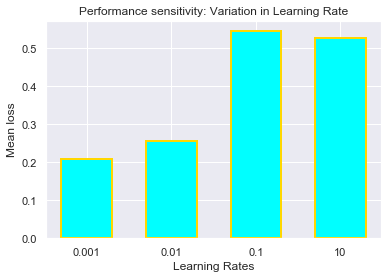

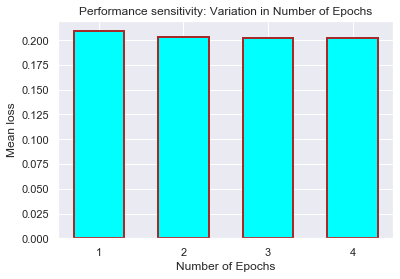

In [259]:
accresults = [meanlossOrig, meanloss1, meanloss2, meanloss3]

bases = [1, 2, 3, 4]
tests = ['0.001','0.01', '0.1', '10']

plt.figure()
plt.bar(x=bases, height=accresults, width=0.6, tick_label = tests, color='Cyan', edgecolor='Gold', linewidth=2)
plt.ylabel("Mean loss")
plt.xlabel('Learning Rates')
plt.title('Performance sensitivity: Variation in Learning Rate')


accresults = [meanlossOrig, meanloss4, meanloss5, meanloss6]

bases = [1, 2, 3, 4]
tests = ['1', '2', '3', '4']

plt.figure()
plt.bar(x=bases, height=accresults, width=0.6, tick_label = tests, color='Cyan', edgecolor='Brown', linewidth=2)
plt.ylabel("Mean loss")
plt.xlabel('Number of Epochs')
plt.title('Performance sensitivity: Variation in Number of Epochs')

<font color='Blue'>

**Question 4e)**

Observation 1: The mean loss decreases very slightly as the number of epochs increases. This is because each epoch serves to improve tthe autoencoder's perception of the true form of the original images.

Observation 2: Looking at the bar graph pf the learning rates, we see a sharp increase in mean loss as the learning rate is increased from 0.001 to 0.1, but a decrease (from 0.1) to 10. This is interesting because it implies that there is a non linear change in the performance with respect to the learning rate, or that there is a peak learning rate value that produces the most loss.

</font>


In [260]:
len(losslist)

10000